<a href="https://colab.research.google.com/github/CLASHERBROs/datasicence-minor-project/blob/main/data_sci_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np

In [3]:
import os
BEARER_TOKEN=os.getenv("BEARER_TOKEN")

We'll install python-twitter to fetch results

In [4]:
!pip install python-twitter

     |████████████████████████████████| 67 kB 5.6 MB/s 


In [5]:
!pip install requests

In [6]:
BEARER_TOKEN

'AAAAAAAAAAAAAAAAAAAAAJmacQEAAAAA76hdc08Mood3wxnHJyIY1JETfTo%3DMllknc8Yrx6AtxYgCarhc4iTmgiqvNVZGmHtLTDYLzT4mdO3ly'

In [7]:
import requests
import json

def search_twitter(query, tweet_fields, bearer_token = BEARER_TOKEN):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}

    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}&max_results=20".format(
        query, tweet_fields
    )
    response = requests.request("GET", url, headers=headers)

    print(response.status_code)

    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [8]:
city='delhi'

In [9]:
query = "Covid beds "+city
tweet_fields = "tweet.fields=text,author_id,created_at"
bed_json_response = search_twitter(query=query, tweet_fields=tweet_fields, bearer_token=BEARER_TOKEN)
print(json.dumps(bed_json_response, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "4508461814",
            "created_at": "2022-05-17T13:14:11.000Z",
            "id": "1526551654685765632",
            "text": "#Delhi new #COVID cases slightly increased (tests slightly increased too) and the positive rate remains same as y'day. Active cases on the declining trend.\n\nNew Cases=393\nDeaths=2\nToday Recovery=709\nTests:11731\nActive=2910\nTPR=3.35%\nBeds occupancy =1.3%\n#COVID19 #Omicron #MaskUp https://t.co/QD0p5yFr1u"
        },
        {
            "author_id": "1084779753863708672",
            "created_at": "2022-05-13T13:58:54.000Z",
            "id": "1525113357652533248",
            "text": "@NirjhariSinha People were dying by thousands without oxygen,hospital beds in Delhi (Covid-19 second wave), we've not seen any mohalla clinic, Kejriwal is spending money in advts only like Modi (thank you Modiji) &amp; @bhupeshbaghel . \nOnly beneficial @ndtv ,now watch 24\u00d77 kejubhai's yoga session."
        }

In [10]:
query = "vaccine "+city
tweet_fields = "tweet.fields=text,author_id,created_at"
vaccine_json_response = search_twitter(query=query, tweet_fields=tweet_fields, bearer_token=BEARER_TOKEN)
print(json.dumps(vaccine_json_response, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "1446853839265611786",
            "created_at": "2022-05-18T08:18:24.000Z",
            "id": "1526839607148568576",
            "text": "@abdullah_0mar @JayantA2909 @ArvindKejriwal No party is perfect bt wat @ArvindKejriwal  hs dn 4 delhi itself speaks volumes, proud 2 vote aap &amp; wil keep doin dat. Ty i live in south delhi electricity bill ws zero last yr water is cumn.Experience of vaccine in gov school ws g8. Keep working hard &amp; keep improving 4 better \u270c\ud83c\udffd"
        },
        {
            "author_id": "1396115471703805953",
            "created_at": "2022-05-18T08:17:06.000Z",
            "id": "1526839279401377792",
            "text": "NE delhi has at least 109 new slots available between 18-05-22 &amp; 25-05-22.\n\nCovishield:\nDose1- 18+/45+:21/0\nDose2- 18+/45+:19/0\n\nCovaxin:\nDose1- 18+/45+:0/0\nDose2- 18+/45+:0/0\n\nBook one now at https://t.co/oN1Ae9Fz77 #vaccine #cowin #covid #delhi"
        }

In [11]:
query = "Covid testing "+city
tweet_fields = "tweet.fields=text,author_id,created_at"
test_json_response = search_twitter(query=query, tweet_fields=tweet_fields, bearer_token=BEARER_TOKEN)
print(json.dumps(test_json_response, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "1366261186086363136",
            "created_at": "2022-05-18T05:54:38.000Z",
            "id": "1526803429351313411",
            "text": "RT @DMSouthDelhi: Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testin\u2026"
        },
        {
            "author_id": "1085465722732580864",
            "created_at": "2022-05-18T05:50:58.000Z",
            "id": "1526802506587643904",
            "text": "RT @DMSouthDelhi: Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testin\u2026"
        },
        {
            "author_id": "1246399904890535936",
            "created_at": "2022-05-18T05:35:37.000Z",
            "id": "1526798643382358016",
            "text": "Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testing centres for today\n

In [12]:
bed_texts=[]
vaccine_texts=[]
test_texts=[]

In [13]:
for i in bed_json_response['data']:
  bed_texts.append(i['text'])
for i in vaccine_json_response['data']:
  vaccine_texts.append(i['text'])
for i in test_json_response['data']:
  test_texts.append(i['text'])

In [14]:
bed_df=pd.DataFrame(bed_texts,columns=["Bed Tweets"])
vaccine_df=pd.DataFrame(vaccine_texts,columns=["Vaccine tweets"])
test_df=pd.DataFrame(test_texts,columns=["test tweets"])


In [15]:
bed_df

,Bed Tweets
0,#Delhi new #COVID cases slightly increased (te...
1,@NirjhariSinha People were dying by thousands ...
2,@alok_bhatt Remember Kejriwal booking an entir...
3,RT @sure99: Pl keep on laughing\nHindus dont c...
4,Pl keep on laughing\nHindus dont curse anyone!...
5,"How sensitive! 4 hour lockdown notice, 40 lakh..."


In [16]:
vaccine_df

,Vaccine tweets
0,@abdullah_0mar @JayantA2909 @ArvindKejriwal No...
1,NE delhi has at least 109 new slots available ...
2,Central Delhi has at least 12737 new slots ava...
3,World AIDS Vaccine Day: जानें कहां से आई ये बी...
4,NE delhi has at least 97 new slots available b...
5,Central Delhi has at least 10990 new slots ava...
6,NE delhi has at least 80 new slots available b...
7,Central Delhi has at least 8903 new slots avai...
8,NE delhi has at least 57 new slots available b...
9,Central Delhi has at least 7857 new slots avai...


In [17]:
test_df

,test tweets
0,RT @DMSouthDelhi: Please do not hesitate and g...
1,RT @DMSouthDelhi: Please do not hesitate and g...
2,Please do not hesitate and get tested if you h...
3,"@stuti_kute Dear Stuti,\nRT-PCR report is not ..."
4,"Visit Free Covid test camps for corona tests, ..."


##Now NLP and we'll fetch positive results from the above

## Training model using LSTM


In [18]:
df= pd.read_csv('train.csv')
df.head(3)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative


In [19]:
tweet_df = df[['text','sentiment']]
tweet_df.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


In [20]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 2, 2, 0]),
 Index(['neutral', 'negative', 'positive'], dtype='object'))

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = tweet_df.text.values.astype("str")
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [23]:
print(tokenizer.word_index)
print(vocab_size)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'it': 6, 'you': 7, 'and': 8, 'is': 9, 'in': 10, 'for': 11, 's': 12, 'of': 13, 't': 14, 'that': 15, 'on': 16, 'me': 17, 'so': 18, 'have': 19, 'but': 20, 'm': 21, 'just': 22, 'day': 23, 'with': 24, 'be': 25, 'at': 26, 'not': 27, 'was': 28, 'all': 29, 'now': 30, 'can': 31, 'good': 32, 'this': 33, 'out': 34, 'up': 35, 'get': 36, 'no': 37, 'are': 38, 'like': 39, 'go': 40, 'http': 41, 'your': 42, 'do': 43, 'work': 44, 'today': 45, 'love': 46, 'too': 47, 'going': 48, 'got': 49, 'we': 50, 'lol': 51, 'what': 52, 'happy': 53, 'one': 54, 'from': 55, 'u': 56, 'time': 57, 'know': 58, 'there': 59, 'really': 60, 'back': 61, 'will': 62, 'com': 63, 'im': 64, 'don': 65, 'about': 66, 'am': 67, 'had': 68, 'its': 69, 'see': 70, 'some': 71, 'they': 72, 'if': 73, 'night': 74, 'new': 75, 'home': 76, '2': 77, 'want': 78, 'well': 79, 'how': 80, 'think': 81, 'as': 82, 'still': 83, 'when': 84, 'll': 85, 'more': 86, 'oh': 87, 'thanks': 88, 'off': 89, 'much': 90, 'here':

In [24]:
print(tweet[0])
print(encoded_docs[0])

 I`d have responded, if I were going
[1, 165, 19, 73, 1, 150, 48]


In [25]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1 165  19  73   1
 150  48]


In [188]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           851168    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 867,819
Trainable params: 867,819
Non-trainable params: 0
________________________________________________

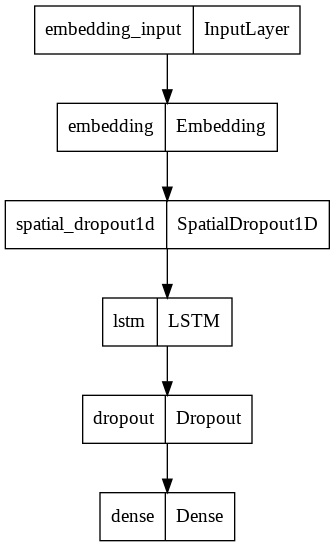

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [28]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
687/687 [==============================] - 131s 186ms/step - loss: -0.4501 - accuracy: 0.3155 - val_loss: -2.6436 - val_accuracy: 0.3829
Epoch 2/5
687/687 [==============================] - 113s 164ms/step - loss: -1.0767 - accuracy: 0.3476 - val_loss: 3.5177 - val_accuracy: 0.2885
Epoch 3/5
687/687 [==============================] - 111s 161ms/step - loss: -5.6097 - accuracy: 0.3860 - val_loss: -7.8928 - val_accuracy: 0.4073
Epoch 4/5
687/687 [==============================] - 111s 161ms/step - loss: -12.6285 - accuracy: 0.4142 - val_loss: -13.2628 - val_accuracy: 0.4082
Epoch 5/5
687/687 [==============================] - 110s 160ms/step - loss: -18.5128 - accuracy: 0.4012 - val_loss: -18.0531 - val_accuracy: 0.4097


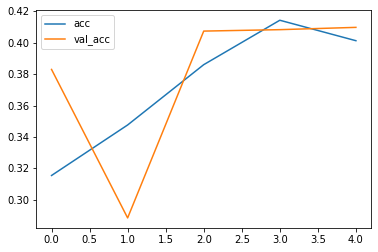

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

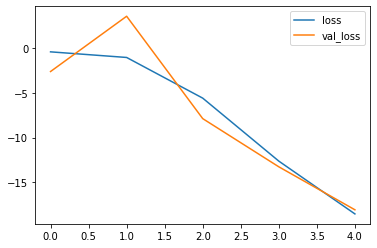

In [30]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [31]:
test_word ="This is soo sad"
tw = tokenizer.texts_to_sequences([test_word])
tw

[[33, 9, 543, 119]]

In [33]:
tw = pad_sequences(tw,maxlen=200)
tw

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [34]:
prediction = int(model.predict(tw).round().item())

In [36]:
sentiment_label[1][prediction]

'negative'

##Word vectors

In [67]:
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path
import nltk
# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [57]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 10  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence
GLOVE_DIM = 100  # Number of dimensions of the GloVe word embeddings

In [58]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history


def eval_metric(history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)

In [69]:
df = pd.read_csv('Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [71]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [72]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    13176.000000
mean        11.135094
std          4.227367
min          1.000000
25%          8.000000
50%         12.000000
75%         14.000000
max         24.000000
Name: text, dtype: float64

In [73]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [74]:
X_train_seq_trunc[10]  # Example of padded sequence

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2908,
        259,  121], dtype=int32)

In [75]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [76]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of validation set:',X_valid_emb.shape)

Shape of validation set: (1318, 24)


###Modeling

In [77]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='softmax'))
emb_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 24, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 579       
                                                                 
Total params: 80,579
Trainable params: 80,579
Non-trainable params: 0
_________________________________________________________________


In [80]:
emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)
emb_history.history['accuracy'][-1]

0.8699612021446228

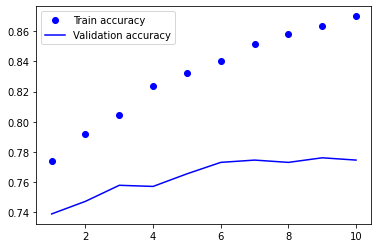

In [82]:
eval_metric(emb_history, 'accuracy')

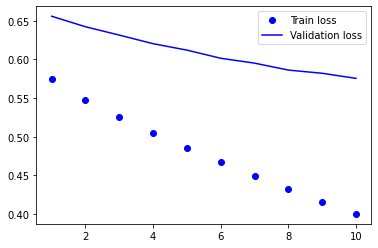

In [83]:
eval_metric(emb_history, 'loss')

In [84]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

46/46 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7671
/n
Test accuracy of word embeddings model: 76.71%


##Machine and Deep learning based

###SVM

In [111]:
!pip install lime

     |████████████████████████████████| 275 kB 21.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=4250debe6e11c09e316ea458504fdc12dcf876d1f1194f1436e31a074898d3bf
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [112]:
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
df =pd.read_csv(r'Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [123]:
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

                 

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


 
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Are under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc



def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model
  

In [125]:

df = df[df['airline_sentiment']!='neutral']
df['cleaned_tweet'] = df['text'].apply(clean_the_tweet)

df.head()
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),you ve added commercials to the experience tacky
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),s really aggressive to blast obnoxious enterta...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),it s a really big bad thing about it
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay a flight for seats that didn t have ...
6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time i fly vx this ear worm won t...


In [126]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(text_process)
df.reset_index(drop=True, inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
0,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),added commercials experience tacky
1,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
2,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
3,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay flight seats playing really bad thin...
4,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time fly vx ear worm go away


In [172]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df.cleaned_tweet)
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, df['airline_sentiment'], random_state=42)

Train confusion matrix is: 
[[6824   31]
 [ 151 1649]]

Test confusion matrix is: 
[[2291   32]
 [ 296  267]]

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2323
           1       0.89      0.47      0.62       563

    accuracy                           0.89      2886
   macro avg       0.89      0.73      0.78      2886
weighted avg       0.89      0.89      0.87      2886


Train accuracy score:  0.9789716926632005
Test accuracy score:  0.8863478863478863

Train ROC-AUC score:  0.9969059080962801
Test ROC-AUC score:  0.9291806622935828

Are under Precision-Recall curve: 0.6194895591647333
Area under ROC-AUC: 0.804983304850608


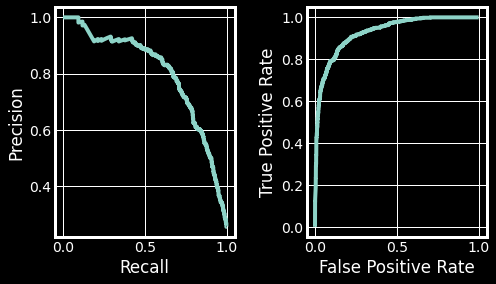

In [129]:
SVM = svm.SVC( probability=True)
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM,x_train, x_test, y_train, y_test)

###Hyperparameter optimisation

In [130]:
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}



svm_optimal = grid_search(svm.SVC(probability=True), parameters,x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   9.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   8.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  13.6s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   6.6s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  10.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   8.4s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   7.3s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.9s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   7.9s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   5.9s
[CV] END ..................C=0.1, gamma=auto, ke

Train confusion matrix is: 
[[6829   26]
 [   5 1795]]

Test confusion matrix is: 
[[2272   51]
 [ 245  318]]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2323
           1       0.86      0.56      0.68       563

    accuracy                           0.90      2886
   macro avg       0.88      0.77      0.81      2886
weighted avg       0.89      0.90      0.89      2886


Train accuracy score:  0.996418255343732
Test accuracy score:  0.8974358974358975

Train ROC-AUC score:  0.9987310154793744
Test ROC-AUC score:  0.9287761813481525

Are under Precision-Recall curve: 0.6824034334763949
Area under ROC-AUC: 0.8075665430473169


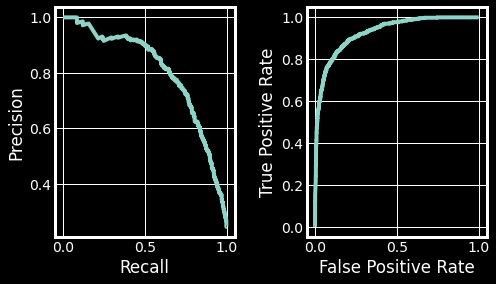

In [131]:
so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc = check_scores(svm_optimal,x_train, x_test, y_train, y_test)

###Multinomial Naive bayes

Train confusion matrix is: 
[[6853    2]
 [1296  504]]

Test confusion matrix is: 
[[2318    5]
 [ 474   89]]

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2323
           1       0.95      0.16      0.27       563

    accuracy                           0.83      2886
   macro avg       0.89      0.58      0.59      2886
weighted avg       0.85      0.83      0.78      2886


Train accuracy score:  0.8500288850375506
Test accuracy score:  0.834026334026334

Train ROC-AUC score:  0.9561105438041981
Test ROC-AUC score:  0.9013005324009118

Are under Precision-Recall curve: 0.2709284627092846
Area under ROC-AUC: 0.7374839454006489


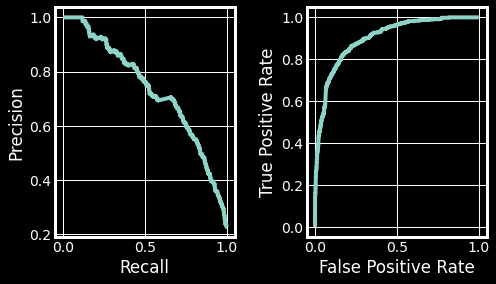

In [132]:
m_train_accuracy, m_test_accuracy, m_train_auc, m_test_auc = check_scores(MultinomialNB(),x_train, x_test, y_train, y_test)

###Gausian Naive bayes

Train confusion matrix is: 
[[5543 1312]
 [   0 1800]]

Test confusion matrix is: 
[[1623  700]
 [ 181  382]]

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      2323
           1       0.35      0.68      0.46       563

    accuracy                           0.69      2886
   macro avg       0.63      0.69      0.63      2886
weighted avg       0.79      0.69      0.72      2886


Train accuracy score:  0.8484113229347198
Test accuracy score:  0.6947331947331947

Train ROC-AUC score:  0.9043034281546316
Test ROC-AUC score:  0.688586755810495

Are under Precision-Recall curve: 0.4644376899696049
Area under ROC-AUC: 0.5471372315951626


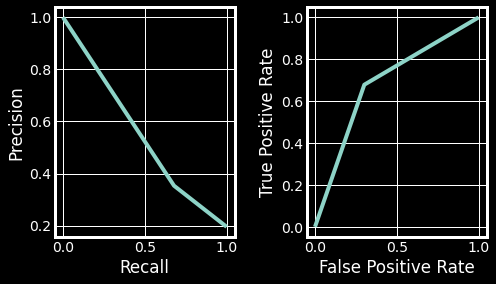

In [133]:
g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc=check_scores(GaussianNB(),x_train.toarray(), x_test.toarray(), y_train, y_test)

###Usina Ada Boost

Train confusion matrix is: 
[[6655  200]
 [1012  788]]

Test confusion matrix is: 
[[2251   72]
 [ 328  235]]

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2323
           1       0.77      0.42      0.54       563

    accuracy                           0.86      2886
   macro avg       0.82      0.69      0.73      2886
weighted avg       0.85      0.86      0.84      2886


Train accuracy score:  0.8599653379549393
Test accuracy score:  0.8613998613998614

Train ROC-AUC score:  0.8689482940270687
Test ROC-AUC score:  0.8373803091947158

Are under Precision-Recall curve: 0.5402298850574713
Area under ROC-AUC: 0.6298876361965743


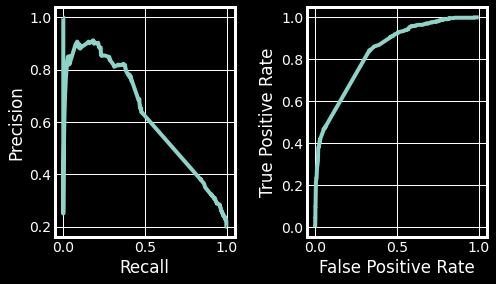

In [134]:
a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=check_scores(AdaBoostClassifier(),x_train,x_test, y_train, y_test)

In [135]:
params = {'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

ada_optimal_model = grid_search(AdaBoostClassifier(), params,x_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   1.5s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   1.5s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   3.8s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   2.7s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  13.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  13.2s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=50; total time=   1.3s
[CV] END algor

Train confusion matrix is: 
[[6761   94]
 [1043  757]]

Test confusion matrix is: 
[[2278   45]
 [ 340  223]]

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2323
           1       0.83      0.40      0.54       563

    accuracy                           0.87      2886
   macro avg       0.85      0.69      0.73      2886
weighted avg       0.86      0.87      0.85      2886


Train accuracy score:  0.868630849220104
Test accuracy score:  0.8665973665973666

Train ROC-AUC score:  0.9218550936056407
Test ROC-AUC score:  0.8779339205061136

Are under Precision-Recall curve: 0.5367027677496993
Area under ROC-AUC: 0.7021179688268547


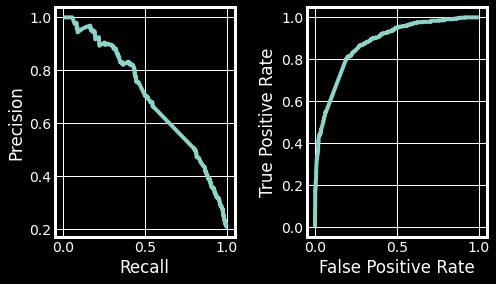

In [136]:
ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc=check_scores(ada_optimal_model,x_train,x_test, y_train, y_test)

###LSTM

In [139]:
corpus = [df['cleaned_tweet'][i] for i in range( len(df))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)
    
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(df['airline_sentiment'])
X_final.shape,y_final.shape

((11541, 124), (11541,))

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
121/121 [==============================] - 23s 169ms/step - loss: 0.4713 - accuracy: 0.8026 - val_loss: 0.3446 - val_accuracy: 0.8561
Epoch 2/10
121/121 [==============================] - 20s 166ms/step - loss: 0.2744 - accuracy: 0.8901 - val_loss: 0.2855 - val_accuracy: 0.8866
Epoch 3/10
121/121 [==============================] - 19s 157ms/step - loss: 0.1972 - accuracy: 0.9208 - val_loss: 0.2987 - val_accuracy: 0.8769
Epoch 4/10
121/121 [==============================] - 19s 157ms/step - loss: 0.1597 - accuracy: 0.9377 - val_loss: 0.3417 - val_accuracy: 0.8805
Epoch 5/10
121/121 [==============================] - 19s 157ms/step - loss: 0.1330 - accuracy: 0.9484 - val_loss: 0.3605 - val_accuracy: 0.8761
Epoch 6/10
121/121 [==============================] - 19s 158ms/step - loss: 0.1178 - accuracy: 0.9572 - val_loss: 0.4111 - val_accuracy: 0.8703
Epoch 7/10
121/121 [==============================] - 19s 157ms/step - loss: 0.1020 - accuracy: 0.9644 - val_loss: 0.4434 - val_ac

In [145]:
predict_x=model.predict(X_test)
y_test_pred=np.argmax(predict_x,axis=1)
predict_y=model.predict(X_train)
y_train_pred=np.argmax(predict_y,axis=1)

In [146]:
test_acc_lstm = accuracy_score(y_test,y_test_pred)
train_acc_lstm = accuracy_score(y_train,y_train_pred)
test_roc_lstm = roc_auc_score(y_test,y_test_pred)
train_roc_lstm = roc_auc_score(y_train,y_train_pred)

###Using random forest

Train confusion matrix is: 
[[6829   26]
 [   5 1795]]

Test confusion matrix is: 
[[2215  108]
 [ 238  325]]

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2323
           1       0.75      0.58      0.65       563

    accuracy                           0.88      2886
   macro avg       0.83      0.77      0.79      2886
weighted avg       0.87      0.88      0.87      2886


Train accuracy score:  0.996418255343732
Test accuracy score:  0.8801108801108801

Train ROC-AUC score:  0.9982442661479861
Test ROC-AUC score:  0.8956867344777572

Are under Precision-Recall curve: 0.6526104417670683
Area under ROC-AUC: 0.7441899264879837


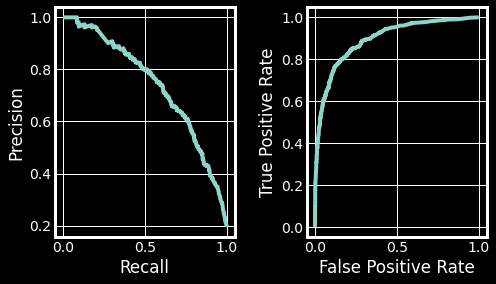

In [137]:
r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc= check_scores(RandomForestClassifier(random_state=0).fit(x_train, y_train), x_train,x_test,y_train,y_test)

In [148]:
data = [('Random Forest', r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc),
 ('MultinomialNB',m_train_accuracy, m_test_accuracy, m_train_auc, m_test_auc  ),
 ('AdaBoost',a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc ),
('AdaBoost Optimized',ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc),
('Gaussian Naive Bayes',g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc),
('SVM', s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc),
('SVM Optimized', so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc),
('LSTM',train_acc_lstm, test_acc_lstm, train_roc_lstm, test_roc_lstm )]


Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy', 'Train ROC', 'Test ROC'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy,Train ROC,Test ROC
Model Name,,,,
Random Forest,0.996418,0.880111,0.998244,0.895687
MultinomialNB,0.850029,0.834026,0.956111,0.901301
AdaBoost,0.859965,0.861400,0.868948,0.837380
AdaBoost Optimized,0.868631,0.866597,0.921855,0.877934
Gaussian Naive Bayes,0.848411,0.694733,0.904303,0.688587
SVM,0.978972,0.886348,0.996906,0.929181
SVM Optimized,0.996418,0.897436,0.998731,0.928776
LSTM,0.794232,0.797322,0.500000,0.500000


###We us svm optimised

In [149]:
model=svm_optimal.fit(X_train, y_train)

In [150]:
X_train

array([[   0,    0,    0, ...,  113, 1779, 1733],
       [   0,    0,    0, ...,   76,  867, 1479],
       [   0,    0,    0, ..., 1923, 3806, 3648],
       ...,
       [   0,    0,    0, ...,  773, 2246,   21],
       [   0,    0,    0, ..., 4073, 4870, 3457],
       [   0,    0,    0, ...,  774,  895,  728]], dtype=int32)

In [193]:
bed_df=pd.DataFrame(bed_texts,columns=["Bed Tweets"])
vaccine_df=pd.DataFrame(vaccine_texts,columns=["Vaccine tweets"])
test_df=pd.DataFrame(test_texts,columns=["test tweets"])

In [159]:
bed_df['bed_cleaned_tweet'] = bed_df['Bed Tweets'].apply(clean_the_tweet)

In [176]:
bed_df['bed_cleaned_tweet'] = bed_df['bed_cleaned_tweet'].apply(text_process)
bed_df.reset_index(drop=True, inplace = True)
bed_df.head()

,Bed Tweets,bed_cleaned_tweet
0,#Delhi new #COVID cases slightly increased (te...,covid cases slightly increased tests slightly ...
1,@NirjhariSinha People were dying by thousands ...,dying thousands without oxygen hospital beds d...
2,@alok_bhatt Remember Kejriwal booking an entir...,remember kejriwal booking entire hospital incl...
3,RT @sure99: Pl keep on laughing\nHindus dont c...,pl keep laughing hindus dont curse anyone amp ...
4,Pl keep on laughing\nHindus dont curse anyone!...,laughing hindus dont curse anyone amp karma da...


In [160]:
vaccine_df['vaccine_cleaned_tweet'] = vaccine_df['Vaccine tweets'].apply(clean_the_tweet)

In [178]:
vaccine_df['vaccine_cleaned_tweet'] = vaccine_df['vaccine_cleaned_tweet'].apply(text_process)
vaccine_df.reset_index(drop=True, inplace = True)
vaccine_df.head()

,Vaccine tweets,vaccine_cleaned_tweet
0,@abdullah_0mar @JayantA2909 @ArvindKejriwal No...,jayanta arvindkejriwal party perfect bt wat ar...
1,NE delhi has at least 109 new slots available ...,least new slots available amp covishield dose ...
2,Central Delhi has at least 12737 new slots ava...,least new slots available amp covishield dose ...
3,World AIDS Vaccine Day: जानें कहां से आई ये बी...,vaccine day worldaidsvaccineday aids apnachann...
4,NE delhi has at least 97 new slots available b...,least new slots available amp covishield dose ...


In [161]:
test_df['test_cleaned_tweet'] = test_df['test tweets'].apply(clean_the_tweet)

In [177]:
test_df['test_cleaned_tweet'] = test_df['test_cleaned_tweet'].apply(text_process)
test_df.reset_index(drop=True, inplace = True)
test_df.head()

,test tweets,test_cleaned_tweet
0,RT @DMSouthDelhi: Please do not hesitate and g...,please hesitate get tested symptoms like fever...
1,RT @DMSouthDelhi: Please do not hesitate and g...,please hesitate get tested symptoms like fever...
2,Please do not hesitate and get tested if you h...,hesitate get tested symptoms like fever cough ...
3,"@stuti_kute Dear Stuti,\nRT-PCR report is not ...",dear stuti rt pcr report required domestic arr...
4,"Visit Free Covid test camps for corona tests, ...",covid test camps corona tests organise distric...


In [182]:
X_tf_idf= vectorizer.fit_transform(bed_df.bed_cleaned_tweet)

In [166]:
X_tf_idf_vaccine= vectorizer.fit_transform(vaccine_df.vaccine_cleaned_tweet)

In [167]:
X_tf_idf_test= vectorizer.fit_transform(test_df.test_cleaned_tweet)

In [183]:
X_tf_idf

<6x117 sparse matrix of type '<class 'numpy.float64'>'
	with 154 stored elements in Compressed Sparse Row format>

In [189]:
bed_lbl=[]
for j in bed_texts:
  tw = tokenizer.texts_to_sequences([j])
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  bed_lbl.append(sentiment_label[1][prediction])

In [190]:
test_lbl=[]
for j in test_texts:
  tw = tokenizer.texts_to_sequences([j])
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  test_lbl.append(sentiment_label[1][prediction])

In [191]:
vaccine_lbl=[]
for j in vaccine_texts:
  tw = tokenizer.texts_to_sequences([j])
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  vaccine_lbl.append(sentiment_label[1][prediction])

In [197]:
bed_df['label']=bed_lbl
vaccine_df['label']=vaccine_lbl
test_df['label']=test_lbl

In [198]:
bed_df

,Bed Tweets,label
0,#Delhi new #COVID cases slightly increased (te...,neutral
1,@NirjhariSinha People were dying by thousands ...,neutral
2,@alok_bhatt Remember Kejriwal booking an entir...,neutral
3,RT @sure99: Pl keep on laughing\nHindus dont c...,neutral
4,Pl keep on laughing\nHindus dont curse anyone!...,neutral
5,"How sensitive! 4 hour lockdown notice, 40 lakh...",neutral


In [199]:
vaccine_df

,Vaccine tweets,label
0,@abdullah_0mar @JayantA2909 @ArvindKejriwal No...,negative
1,NE delhi has at least 109 new slots available ...,neutral
2,Central Delhi has at least 12737 new slots ava...,neutral
3,World AIDS Vaccine Day: जानें कहां से आई ये बी...,neutral
4,NE delhi has at least 97 new slots available b...,neutral
5,Central Delhi has at least 10990 new slots ava...,neutral
6,NE delhi has at least 80 new slots available b...,neutral
7,Central Delhi has at least 8903 new slots avai...,neutral
8,NE delhi has at least 57 new slots available b...,neutral
9,Central Delhi has at least 7857 new slots avai...,neutral


In [200]:
test_df

,test tweets,label
0,RT @DMSouthDelhi: Please do not hesitate and g...,negative
1,RT @DMSouthDelhi: Please do not hesitate and g...,negative
2,Please do not hesitate and get tested if you h...,neutral
3,"@stuti_kute Dear Stuti,\nRT-PCR report is not ...",neutral
4,"Visit Free Covid test camps for corona tests, ...",neutral
